In [1]:
import math
import re
import nltk
import csv
from nltk.tokenize import word_tokenize
from csv import writer
from nltk.corpus import gutenberg, stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
#from keras.layers import LSTM
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import transformers as ppb
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
#from sklearn.svm import LSSVC
from mlxtend.evaluate import bias_variance_decomp
import random
import pandas as pd
nltk.download('wordnet')
from nltk.tokenize import regexp_tokenize
en_stops = set(stopwords.words('english'))
name_book=nltk.corpus.gutenberg.fileids()
from nltk.stem import WordNetLemmatizer 
from urllib import request
import numpy as np
from sklearn.model_selection import KFold

from sklearn.decomposition import PCA # Needed for dimension reduction
from sklearn.preprocessing import StandardScaler
from yellowbrick.text import TSNEVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import homogeneity_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.text import TSNEVisualizer

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mohamed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:

def prepare_data(name,label):
 
    with open(name) as f:
        lines =f.read().lower()
    book_words= regexp_tokenize(lines,r'([a-zA-Z0-9]{3,})[\,|\s|\.]') # remove #@%^&*? from words 
    file=[]
    book_data=[]
    for w in book_words: # remove stop words 
        if w not in en_stops:
            file.append(w)
    lemmatizer = WordNetLemmatizer()
    lemmatized_output=[]
    lemmatized_output = [lemmatizer.lemmatize(w) for w in file]
    #print( lemmatized_output)
    book=[]
    num_part=int(len(file)/50)
    for i in range(num_part): 
        
        book.append(file[i*50:(i+1)*50])
        book_data.append(' '.join(book[i]))
        
    df = pd.DataFrame({"partitions":book_data})
    df[1]=label # give every partations label with book name 
    dataframe= pd.DataFrame()
    dataframe= df.sample(n=num_part)
    return dataframe

In [12]:
url = [
"medicine.txt"
,"philosoghy.txt"
,"politics article.txt"
,"cs.txt"
,"history.txt"]
label=[0,1,2,3,4]

In [13]:
data =pd.DataFrame()
for i in range(5):
    
    data=data.append(prepare_data(url[i],label[i]))
data = data.rename(columns={1: 'Author'})
data



,partitions,Author
36,pregnancies low ses lanes hara swain pearlstei...,0
28,pathibhakti translated hindi utmost loyalty de...,0
1,development infant field wisner sit postpartum...,0
42,prevalence may also help gain direct understan...,0
4,domestic cultural factors gender child may exp...,0
...,...,...
13,destruction reality another fear important sov...,4
10,increasingly antagonistic relationship formed ...,4
80,connection established tactics allowed achieve...,4
44,chua 2004 thus rvn republic collapsed 1975 hoa...,4


In [14]:
#BOW
coun_vect = CountVectorizer()
BOW_vectors = coun_vect.fit_transform(data["partitions"])
count_array = BOW_vectors.toarray()



df = pd.DataFrame(count_array,columns = coun_vect.get_feature_names())

BOW_vectors
df

C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,017,100,116th,117,123,12th,134,13th,151,...,younger,youth,zedong,zero,zhang,zhao,zhenbao,zhong,zhou,ziyang
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
290,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
#TF_IDF
tfidf_vectorizer=TfidfVectorizer(use_idf=True)
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(data["partitions"])

df1 = pd.DataFrame(tfidf_vectorizer_vectors.toarray(),columns=tfidf_vectorizer.get_feature_names())


first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[1]
df = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)
df1



C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,017,100,116th,117,123,12th,134,13th,151,...,younger,youth,zedong,zero,zhang,zhao,zhenbao,zhong,zhou,ziyang
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000
289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000
290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.161583,0.0,0.0,0.0,0.161583
291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000


In [7]:
#N_gram
count_vect = CountVectorizer(ngram_range=(1,2))
ngram_vectors=count_vect.fit_transform(data["partitions"])
df1 = pd.DataFrame(ngram_vectors.toarray(),columns=count_vect.get_feature_names())
df1

C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,000 000,000 drug,000 funding,000 less,000 mccutcheon,000 people,000 prostitutes,000 vietnamese,000 women,...,zhenbao territory,zhong,zhong china,zhong firmly,zhong perhaps,zhong xidong,zhou,zhou enlai,ziyang,ziyang shambaugh
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#general func of train_test_split
def training_testing(matrix):
    x_data=matrix.toarray()
    y_data=data["Author"]

    X_tr, X_tst, y_tr, y_tst = train_test_split(x_data, y_data, test_size=0.30, random_state=45)
    
    return(X_tr, X_tst, y_tr, y_tst)
    

In [9]:
def models (model):
    MODEL=model
    MODEL.fit(X_train,y_train)
    MODEL_PREDICTION=MODEL.predict(X_test)
    print(accuracy_score(MODEL_PREDICTION, y_test))
    print(confusion_matrix(MODEL_PREDICTION, y_test))
    plot_confusion_matrix(model, X_test, y_test)
    plt.show()
    print(classification_report(MODEL_PREDICTION, y_test))
    return 

# 3 Models of classificationels

 **********************for BOW **********************


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all p

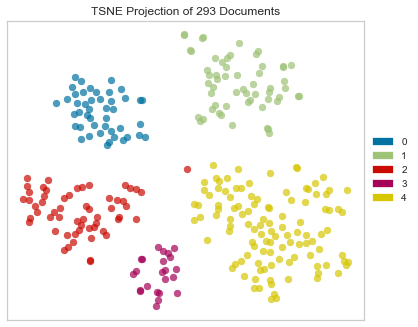

 **********************for SVC() **********************
0.9659090909090909
[[13  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  3 32]]


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


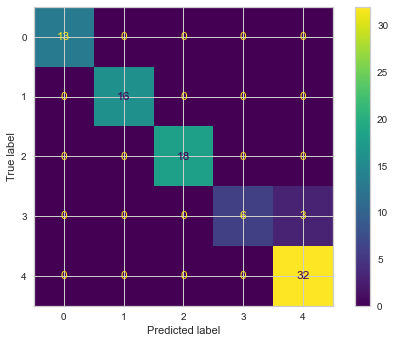

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        18
           3       0.67      1.00      0.80         6
           4       1.00      0.91      0.96        35

    accuracy                           0.97        88
   macro avg       0.93      0.98      0.95        88
weighted avg       0.98      0.97      0.97        88

 **********************for RandomForestClassifier() **********************
0.9886363636363636
[[13  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0  8  0]
 [ 0  0  0  1 32]]


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


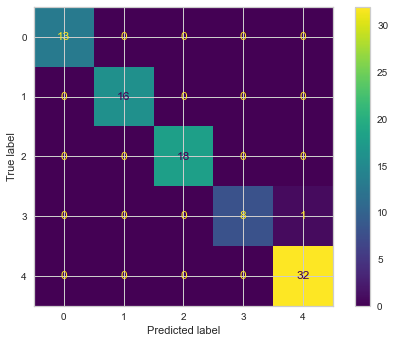

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        18
           3       0.89      1.00      0.94         8
           4       1.00      0.97      0.98        33

    accuracy                           0.99        88
   macro avg       0.98      0.99      0.99        88
weighted avg       0.99      0.99      0.99        88

 **********************for GaussianNB() **********************
1.0
[[13  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0 32]]


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


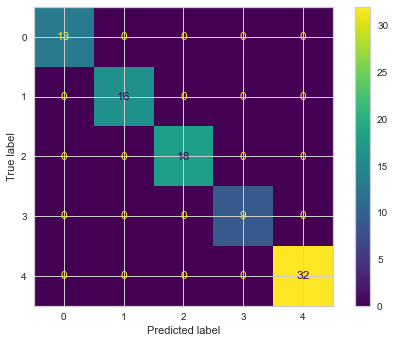

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        32

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88

 **********************for MLPClassifier() **********************
1.0
[[13  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0 32]]


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


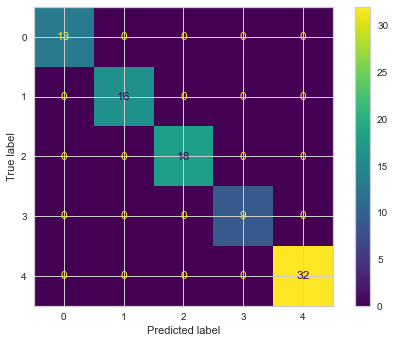

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        32

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88

 **********************for TFIDF **********************


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all p

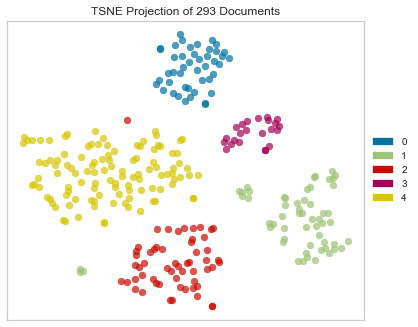

 **********************for SVC() **********************
0.9090909090909091
[[12  0  0  0  0]
 [ 0 15  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0  3  0]
 [ 1  1  0  6 32]]


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


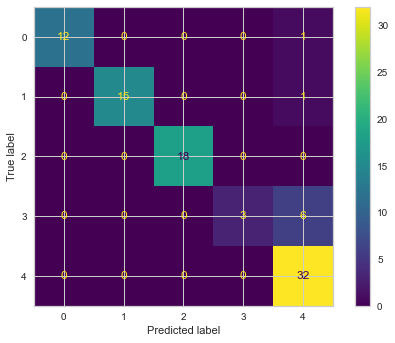

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.94      1.00      0.97        15
           2       1.00      1.00      1.00        18
           3       0.33      1.00      0.50         3
           4       1.00      0.80      0.89        40

    accuracy                           0.91        88
   macro avg       0.84      0.96      0.86        88
weighted avg       0.96      0.91      0.92        88

 **********************for RandomForestClassifier() **********************
0.9886363636363636
[[13  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0  8  0]
 [ 0  0  0  1 32]]


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


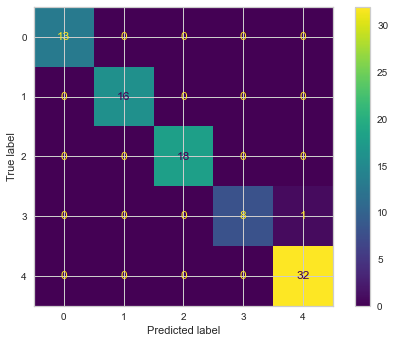

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        18
           3       0.89      1.00      0.94         8
           4       1.00      0.97      0.98        33

    accuracy                           0.99        88
   macro avg       0.98      0.99      0.99        88
weighted avg       0.99      0.99      0.99        88

 **********************for GaussianNB() **********************
0.9886363636363636
[[13  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0 17  0  0]
 [ 0  0  0  9  0]
 [ 0  0  1  0 32]]


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


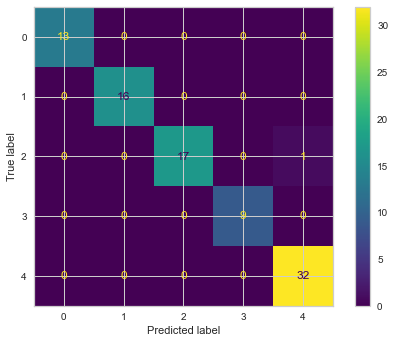

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       0.94      1.00      0.97        17
           3       1.00      1.00      1.00         9
           4       1.00      0.97      0.98        33

    accuracy                           0.99        88
   macro avg       0.99      0.99      0.99        88
weighted avg       0.99      0.99      0.99        88

 **********************for MLPClassifier() **********************
1.0
[[13  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0 32]]


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


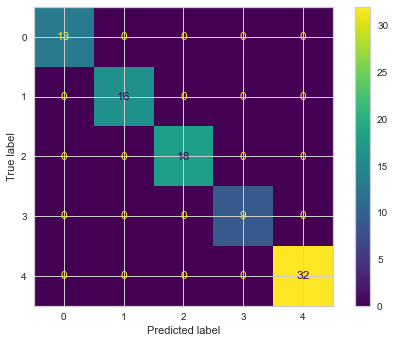

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        32

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88

 **********************for N_gram **********************


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all p

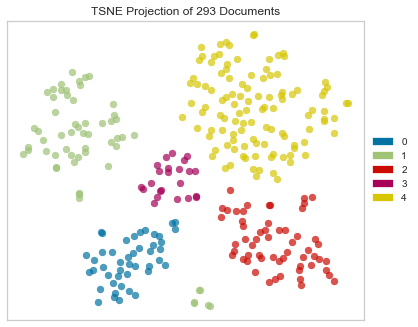

 **********************for SVC() **********************
0.8977272727272727
[[12  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0  1  0]
 [ 1  0  0  8 32]]


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


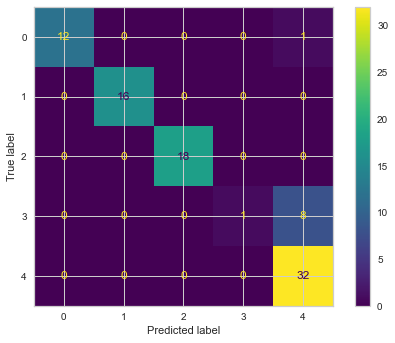

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        18
           3       0.11      1.00      0.20         1
           4       1.00      0.78      0.88        41

    accuracy                           0.90        88
   macro avg       0.81      0.96      0.81        88
weighted avg       0.98      0.90      0.93        88

 **********************for RandomForestClassifier() **********************
0.9545454545454546
[[13  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0  5  0]
 [ 0  0  0  4 32]]


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


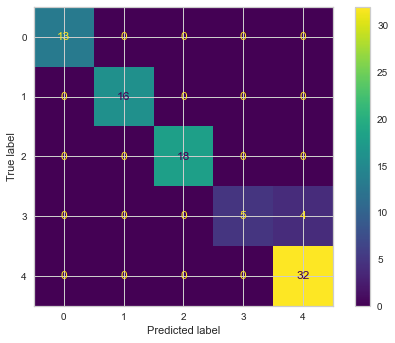

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        18
           3       0.56      1.00      0.71         5
           4       1.00      0.89      0.94        36

    accuracy                           0.95        88
   macro avg       0.91      0.98      0.93        88
weighted avg       0.97      0.95      0.96        88

 **********************for GaussianNB() **********************
1.0
[[13  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0 32]]


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


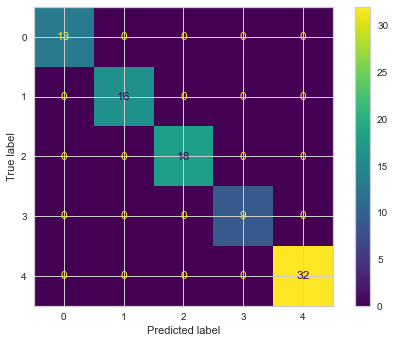

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        32

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88

 **********************for MLPClassifier() **********************


C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\Mohamed\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.9886363636363636
[[13  0  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0 18  0  0]
 [ 0  0  0  8  0]
 [ 0  0  0  1 32]]


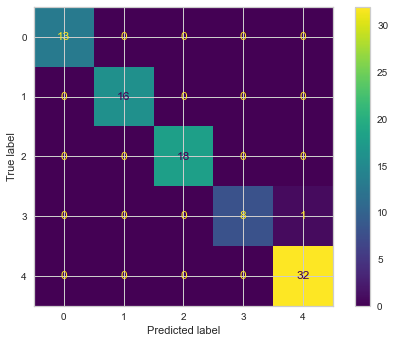

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        18
           3       0.89      1.00      0.94         8
           4       1.00      0.97      0.98        33

    accuracy                           0.99        88
   macro avg       0.98      0.99      0.99        88
weighted avg       0.99      0.99      0.99        88



In [10]:
models_list=[SVC()
             ,RandomForestClassifier()
             ,GaussianNB()
             , MLPClassifier()]
features_engineering=[BOW_vectors,tfidf_vectorizer_vectors,ngram_vectors]
features_engineering_names=['BOW','TFIDF','N_gram']

   
for j in range(len(features_engineering)):  
    X_train, X_test, y_train, y_test=training_testing(features_engineering[j]) 
    print(' **********************'+'for '+features_engineering_names[j]+' **********************')
    tsne = TSNEVisualizer()
    tsne.fit(features_engineering[j],data["Author"])
    tsne.show()
    for i in models_list:
        print(' **********************'+'for '+str(i)+' **********************')
        models(i)





# Clustering

In [12]:
lda = LatentDirichletAllocation(n_components=5,random_state=0) 
for i in range(len(features_engineering)):
    LDA_out= lda.fit_transform(features_engineering[i])
    pca = PCA(n_components=2)
    pca.fit(LDA_out)
    dff=pca.transform(LDA_out)
    model =KMeans(n_clusters=4, init='k-means++',random_state=0)
    ypred=model.fit_predict(dff)
    silhouette_avg = silhouette_score(dff ,ypred,metric='euclidean')
    print(' **********************'+'for '+features_engineering_names[i]+' **********************')
    print("The average silhouette_score is :", silhouette_avg)


 **********************for BOW **********************
The average silhouette_score is : 0.6984884235831238
 **********************for TFIDF **********************
The average silhouette_score is : 0.8787806960932061
 **********************for N_gram **********************
The average silhouette_score is : 0.9295603141183638


In [14]:
lda = LatentDirichletAllocation(n_components=5,random_state=0) 
for i in range(len(features_engineering)):
    LDA_out= lda.fit_transform(features_engineering[i])
    pca = PCA(n_components=2)
    pca.fit(LDA_out)
    dff=pca.transform(LDA_out)
    model =AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
    ypred=model.fit_predict(dff)
    silhouette_avg = silhouette_score(dff ,ypred,metric='euclidean')
    print(' **********************'+'for '+features_engineering_names[i]+' **********************')
    print("The average silhouette_score is :", silhouette_avg)


 **********************for BOW **********************
The average silhouette_score is : 0.7011739409238595
 **********************for TFIDF **********************
The average silhouette_score is : 0.8889046179563918
 **********************for N_gram **********************
The average silhouette_score is : 0.9319043434866211


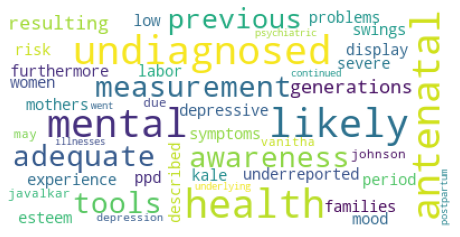

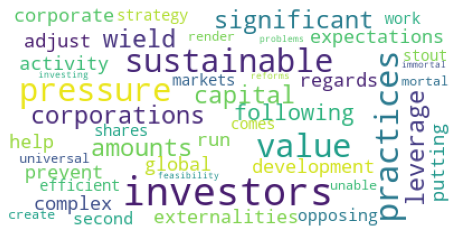

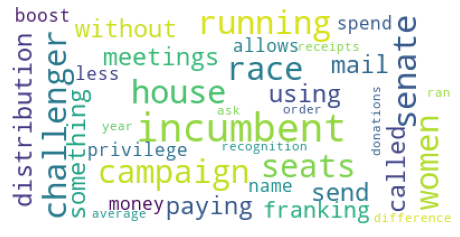

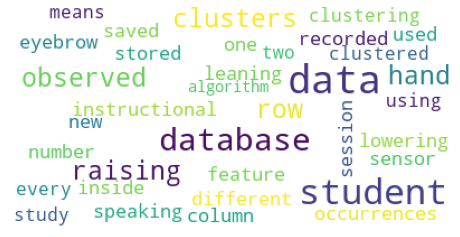

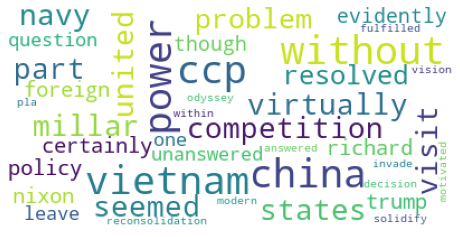

In [15]:
import wordcloud
dat =pd.DataFrame()
for i in range(5):
    
    dat=prepare_data(url[i],label[i])
    x=dat.iloc[:,0:1].to_numpy()
    
    wc = wordcloud.WordCloud(background_color='white', max_words=200, 
                             max_font_size=35)
    wc = wc.generate(x[0][0])
    fig = plt.figure(num=1)
    plt.axis('off')
    plt.imshow(wc, cmap=None)
    plt.show()

In [16]:
# function get_top_n_woeds by  Susan Li  link:https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

for i in range(5):
    book=prepare_data(url[i],label[i])
    common_words_book = get_top_n_words(book["partitions"], 10)
    print(f"top 10 frequent words in book {i} is: \n ")
    for x in range(len(common_words_book)):
        print(common_words_book[x])
common_words_book3=get_top_n_words(book["partitions"], 10)

top 10 frequent words in book 0 is: 
 
('ppd', 68)
('studies', 46)
('risk', 43)
('factors', 29)
('mothers', 22)
('associated', 19)
('india', 18)
('higher', 16)
('health', 15)
('mental', 14)
top 10 frequent words in book 1 is: 
 
('future', 71)
('investors', 58)
('capitalism', 51)
('time', 32)
('value', 31)
('term', 30)
('immortal', 28)
('rate', 28)
('market', 26)
('corporations', 23)
top 10 frequent words in book 2 is: 
 
('women', 111)
('candidates', 44)
('female', 42)
('campaign', 33)
('money', 30)
('men', 30)
('donors', 22)
('gender', 21)
('political', 19)
('fundraising', 18)
top 10 frequent words in book 3 is: 
 
('student', 34)
('data', 29)
('learning', 26)
('algorithm', 26)
('used', 22)
('attentiveness', 17)
('students', 16)
('attentive', 12)
('research', 11)
('inattentive', 11)
top 10 frequent words in book 4 is: 
 
('vietnam', 95)
('war', 90)
('china', 87)
('soviet', 67)
('deng', 65)
('chinese', 65)
('vietnamese', 61)
('invasion', 51)
('power', 46)
('pla', 44)


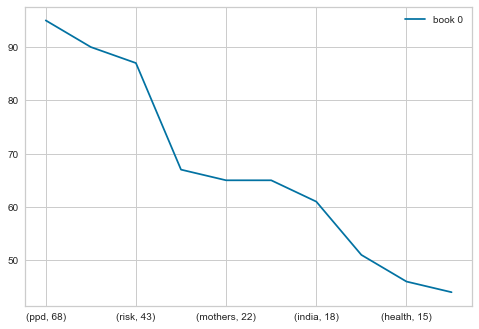

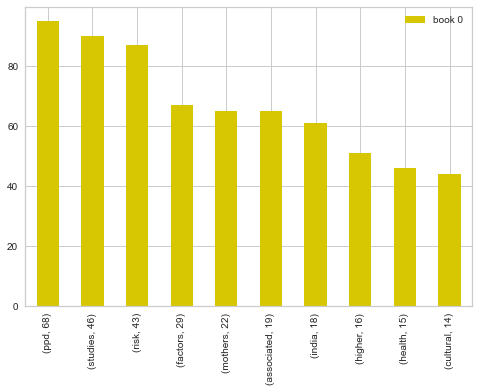

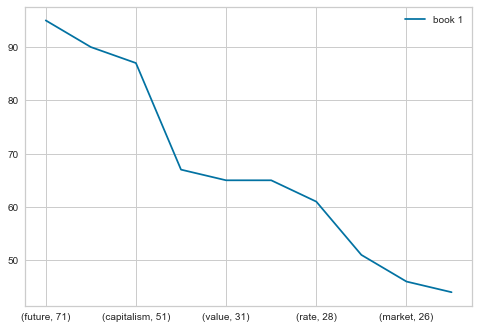

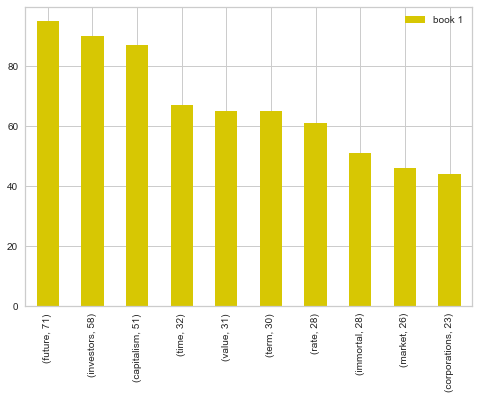

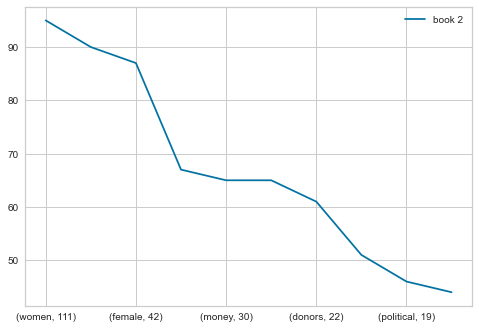

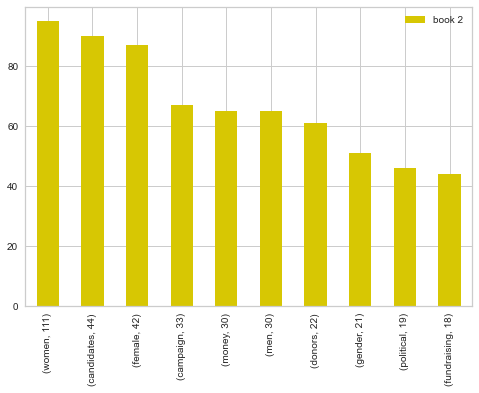

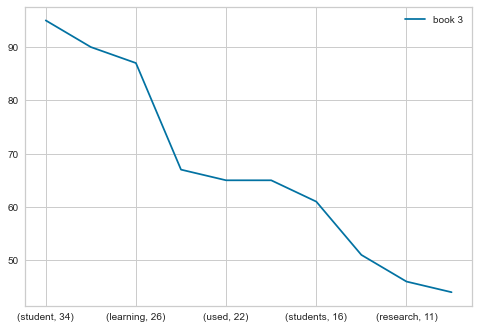

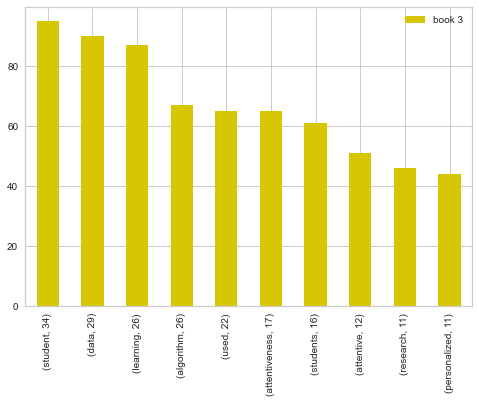

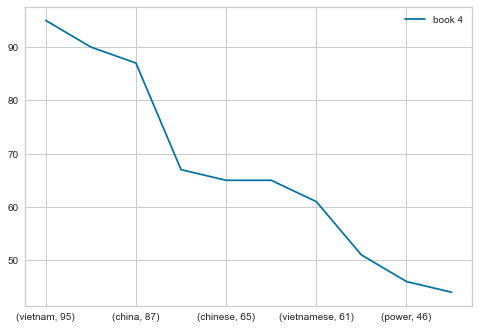

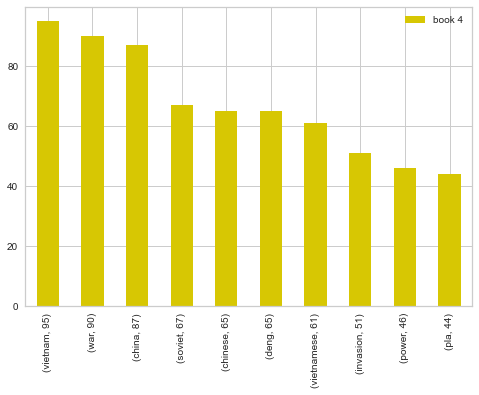

In [18]:
for i in range(5):
    dat=prepare_data(url[i],label[i])
    common_words = get_top_n_words(dat["partitions"], 10)
    df2=pd.DataFrame(common_words_book3,common_words,columns=['label',f'book {i}'])
    df2.plot()
    df2.plot.bar(stacked=True,color='y')